In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)
# shows all the rows
pd.set_option('display.max_rows', None)
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

sns.set_palette(palette='icefire')

import wrangle

# Hospital Readmission Prediction Project



## Goals:
- This project seeks to create a model that classifies whether a patient is likely to be readmitted to the hospital within 30 days of discharge given the health conditions. This information will help Hospitals to determine individual patients' risk of returning in the hospital in this time period.

## Project Description
- Hospitals in USA spent over $41 billion on patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care.

## Key Questions
1. Is there a relation between the race and chances of hospital readmission?
2. Does gender correlates to hospital readmission?
3. Does max_gluserum (glucose level) has relation with patient being readmitted within 30 days?
4. Does patients inpatient visits over the past year increases the chances of hospital rfeadmission?
5. Does patient with longer hospital stays before being discharged has higher chances of readmission?


## Pipeline
### Data Acquistion
- Data for the project was acquired from the csv file
- Data Source: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [2]:
# import get_diabetic_data function from wrangle module


df= wrangle.get_diabetic_data()
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Data Preaparation
The dataframe df was cleaned by following cleanisng process:
- dropped the unwanted columns
- converted the invalid datas to np.nan and nulls were handled
- dummies for categorical columns were created and concatenated to the dataframe



In [3]:
#  import clean_diabetic function from wrangle module

df= wrangle.clean_diabetic(df)
df.head()

,race,gender,age,time_in_hospital,num_medications,number_inpatient,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_Steady,insulin_Up,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,glyburide-metformin_Down,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,diabetesMed_Yes,metformin-pioglitazone_Steady
0,Caucasian,Female,[0-10),1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,[10-20),3,18,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,AfricanAmerican,Female,[20-30),2,13,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,[30-40),2,16,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,Caucasian,Male,[40-50),1,8,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


## Data Split

### Splitting the cleaned data to train, validate and test samples

- test_validate_test_split funtion splits the data into three samples i.e train,validate and test
- I used the train sample to explore, fit the modules.
- Validate sample was used validate our model performance during training.
- The test sample was used to provide an unbiased final model performance metric in terms of accuracy,precision etc.

- data_split function returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [4]:
# import data split function from wrangle module
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.data_split(df)

In [5]:
print(train.shape)
print(validate.shape)
print(test.shape)

(56987, 78)
(24423, 78)
(20353, 78)


## Exploratory Data Analysis

### Question 1
**Is there a relation between the Race and chances of Hospital Readmission?**

<AxesSubplot:xlabel='race', ylabel='count'>

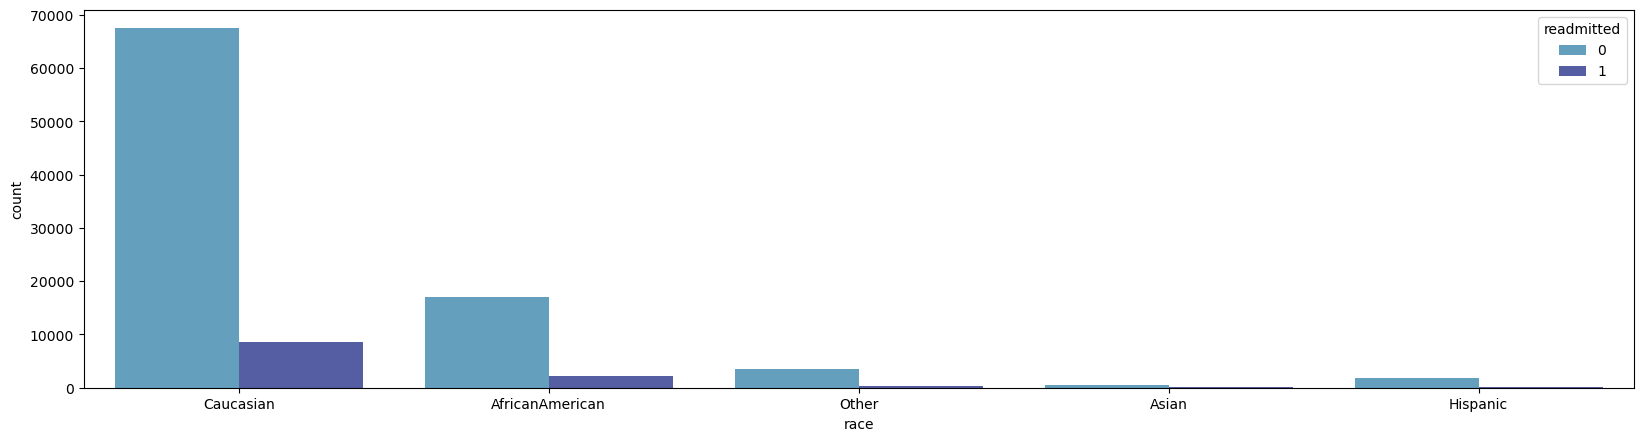

In [6]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['race'], hue=df.readmitted)

### statistical test

$H_0$:There is no realtion between hospital readmission and race.

$H_a$: readmission and race are correlated

- Chi squared test as both features are categorial



In [7]:
α=0.05
observed =pd.crosstab(train.readmitted, train.race)
observed

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
readmitted,,,,,
0,9615,293,37803,1020,1901
1,1206,41,4816,105,187


In [8]:
# chi square test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(15.288481027853464,
 0.004138808844387802,
 4,
 array([[9.61427820e+03, 2.96753435e+02, 3.78662714e+04, 9.99543756e+02,
         1.85515321e+03],
        [1.20672180e+03, 3.72465650e+01, 4.75272860e+03, 1.25456244e+02,
         2.32846790e+02]]))

In [9]:
if p< α:
    print('Since  p< α, these two categorical variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two categorical varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two categorical variables are dependent to eachother.
Null Hypothesis rejected


### Takeaways from question 1
- Race is a factor that could determine the probability of hospital readmission

## Question no 2
**Does gender correlates to hospital readmission?**

<AxesSubplot:xlabel='gender', ylabel='count'>

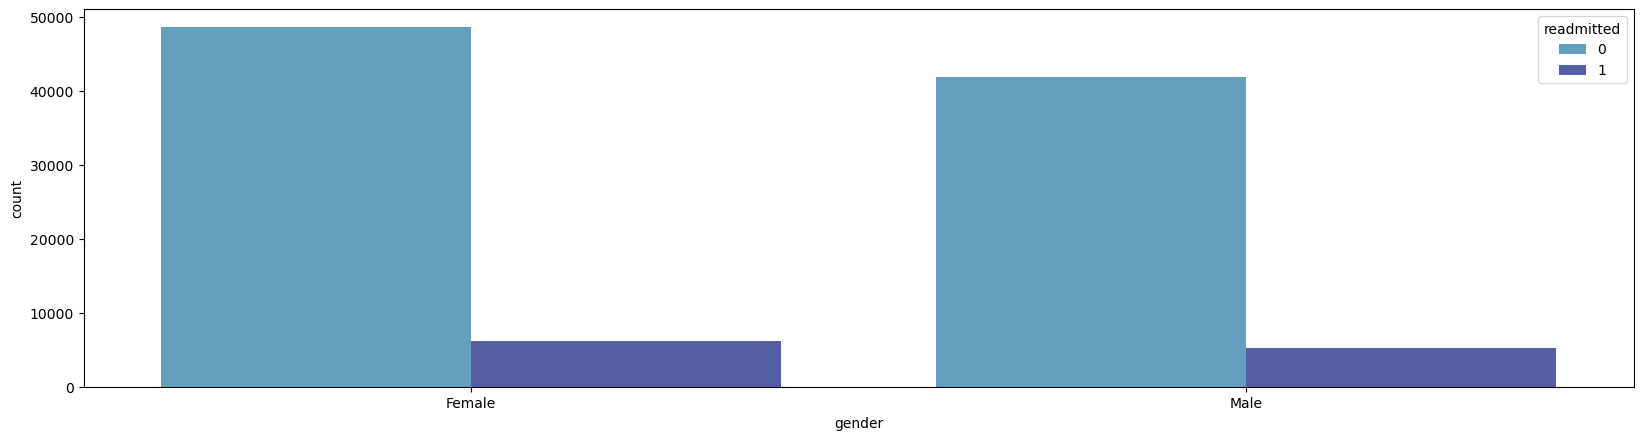

In [10]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['gender'], hue=df.readmitted)

### statistical test

$H_0$:There is no realtion between hospital readmission and gender.

$H_a$: readmission and gender are correlated

- Chi squared test as both features are categorial



In [11]:
α=0.05
observed =pd.crosstab(train.readmitted, train.gender)
observed

gender,Female,Male
readmitted,,
0,27290,23342
1,3422,2933


In [12]:
if p< α:
    print('Since  p< α, these two categorical variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two categorical varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two categorical variables are dependent to eachother.
Null Hypothesis rejected


### Takeaways from question 2
- gender and hospital readmission are dependent

### Question 3
**Does age group has relation with patient being readmitted within 30 days?**


<AxesSubplot:xlabel='age', ylabel='count'>

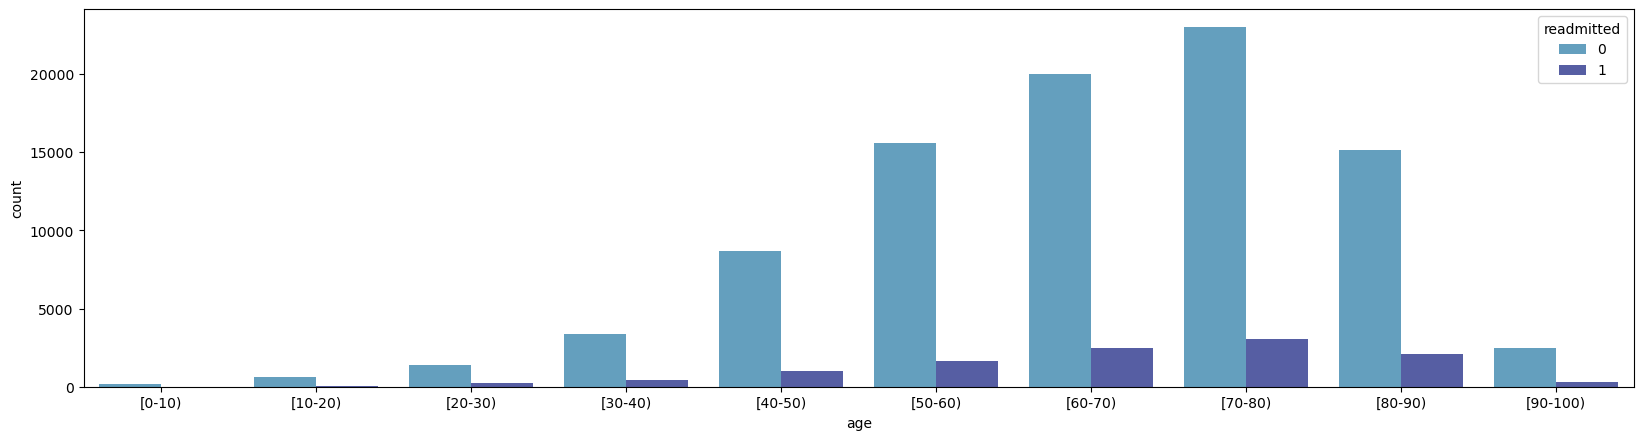

In [13]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['age'], hue=df.readmitted)

### statistical test

$H_0$:There is no realtion between hospital readmission and age group.

$H_a$: readmission and age group are correlated

- Chi squared test as both features are categorial



In [14]:
α=0.05
observed =pd.crosstab(train.readmitted, train.age)
observed

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
readmitted,,,,,,,,,,
0,86,352,843,1897,4888,8679,11232,12842,8434,1379
1,1,19,123,232,597,950,1388,1689,1165,191


In [15]:
if p< α:
    print('Since  p< α, these two categorical variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two categorical varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two categorical variables are dependent to eachother.
Null Hypothesis rejected


### Takeaways 
- agegroup and hospital readmission are dependent

### Question 4
**Does patients inpatient visits over the past year increases the chances of hospital rfeadmission?**


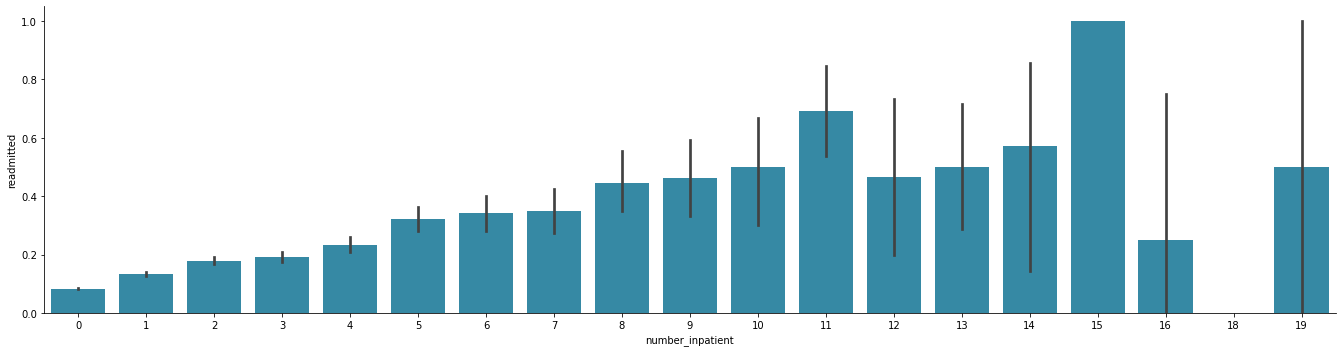

In [16]:
sns.catplot(x='number_inpatient', y= 'readmitted',data = train, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])

### Question 5
**Does patient with longer hospital stays before being discharged has higher chances of readmission?**

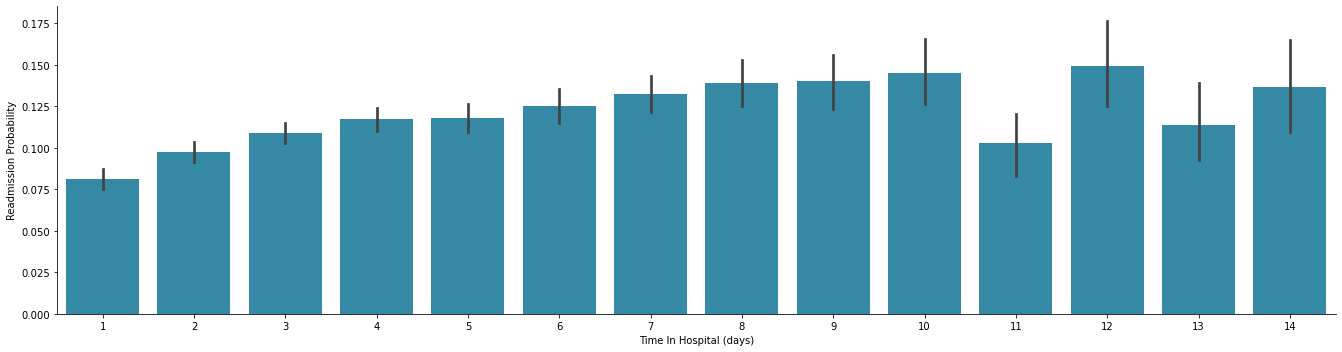

In [17]:
time_in_hospital = sns.catplot(x = 'time_in_hospital', y = "readmitted", data = train, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
time_in_hospital.set_ylabels("Readmission Probability")
time_in_hospital.set_xlabels("Time In Hospital (days)")
plt.tight_layout()

### From the exploration it was found that features  explored are dependent to determining the hospital readmission. The statistical testing also proves that those features have influence on the patient readmission within 30 days after discharge.

# Modeling

- Classification machine learning was used to fit the training data as our target variable is yes/no value. Three different model were created and best model with high accuracy was used to test the test sample. The best model with high accuracy will be picked.
- I used the Accuracy metrics as it describes how often the classifier is predicting correctly overall.

In [18]:
train.readmitted.value_counts()

0    50632
1     6355
Name: readmitted, dtype: int64

#### Baseline
- Since '0' has highere value counts, I set the baseline prediction to  hospital_readmission == 0

In [19]:
# baseline accuracy for train set
train['baseline']= 0

baseline_accuracy=(train.readmitted == train.baseline).mean()
print(f'The baselline Accuracy for Train data ={baseline_accuracy:.4%}')

The baselline Accuracy for Train data =88.8483%


# Fit the Train Data into 3 different models

- I will be using following three diffrent models to compare
#### Decision Tree
#### Random Forest
#### Logistic Regression



## Decision Tree

In [20]:
# Make the model named as tree1 
tree1 = DecisionTreeClassifier(max_depth=8, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

,TRAIN,VALIDATE
ACCURACY,0.889133,0.885026
PERCISION,0.893617,0.032258
RECALL,0.006609,0.000360
F1,0.013121,0.000712


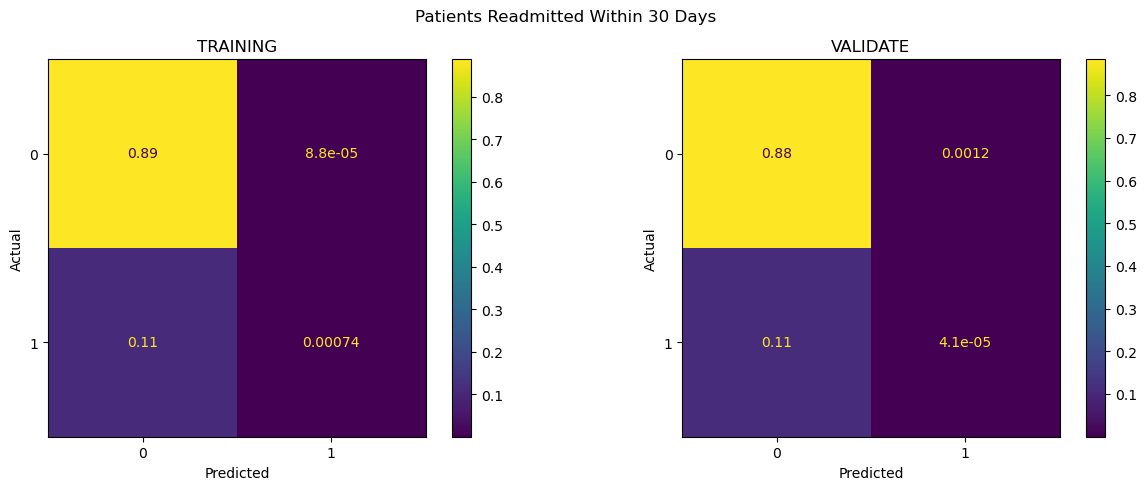

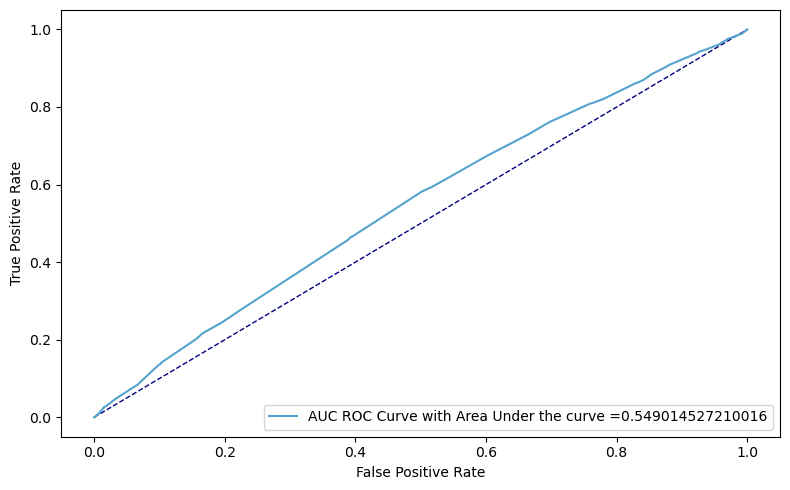

In [21]:
# import the function from wrangle module for report and AUC curve

wrangle.report_and_matrix(tree1, X_train, X_validate, y_train, y_validate)
wrangle.generate_auc_roc_curve(tree1,X_test, y_test)



## Random Forest

In [22]:
# make the model 'forest1' by using random forrest
forest = RandomForestClassifier(max_depth=8, random_state=123)

#fit the model on train data and validate data
forest1=forest.fit(X_train,y_train)

,TRAIN,VALIDATE
ACCURACY,0.888483,0.886214
PERCISION,0.000000,0.000000
RECALL,0.000000,0.000000
F1,0.000000,0.000000


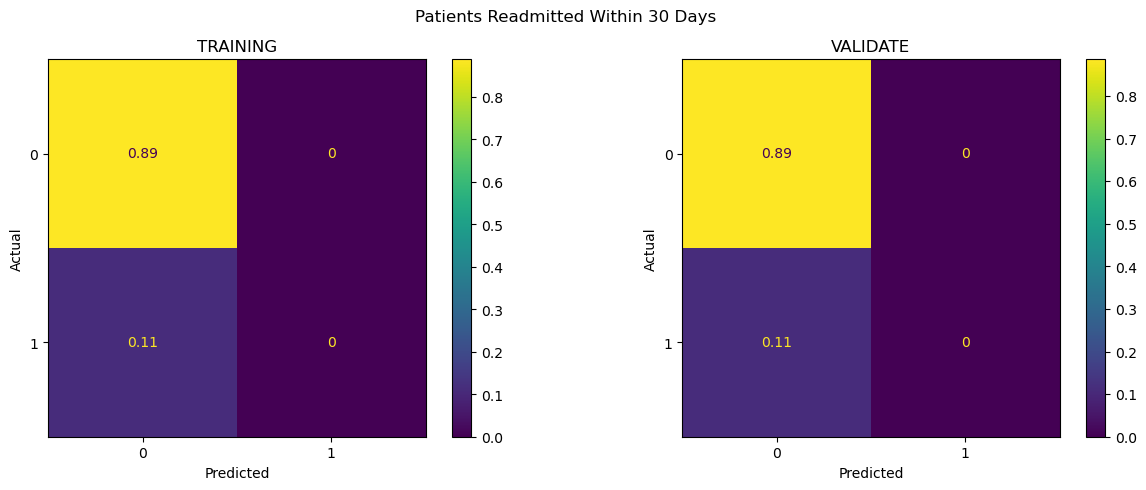

In [24]:
# report and matrix  from wrangle module
wrangle.report_and_matrix(forest1, X_train, X_validate, y_train, y_validate)


# Logistic Regression

In [25]:
# make the model 'logit' by using logistic regresssion
logit = LogisticRegression(C=1,random_state=123)

#fit the model on train data and validate data
logit1=logit.fit(X_train,y_train)

,TRAIN,VALIDATE
ACCURACY,0.888483,0.886214
PERCISION,0.000000,0.000000
RECALL,0.000000,0.000000
F1,0.000000,0.000000


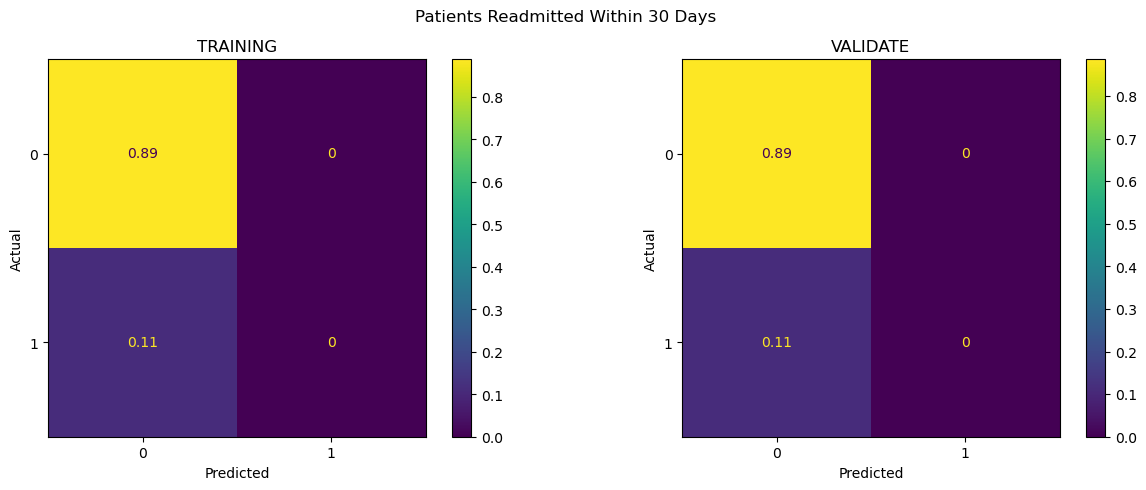

In [27]:
wrangle.report_and_matrix(logit1, X_train, X_validate, y_train, y_validate)

## Comparing all the accuracies, it is clear that the none of the model performed well above the baseline 

# Summary
- It was found that if the patient had more Inpatients stays in hospital over a past year the probability of readmission within 30 days was higher.
- It was found that if the patient had spent more time in hospital ( considering serious illness ) the probability of readmission within 30 days was higher.
- Race, gender, age  and insulin level, max_gluserum  are  also related to patient being readmitted 

# Recommendations
- Three different classification models were created and iot was found that none of the models created outperformed the baseline model. Accuracy for the baseline model and 3 different classification model were same around 89%. So, I would recommend on tuning the hyperparameters. And also since there are many columns that can be clustered together, I would recommend approaching the cluster methodoligies.
- I would recommend choosing a different metrics like recall beacuse readmission will increase the cost to the hospitals and if the algorithm/model predicts that the patients won't be admitted again within 30 days and if the patients gets admitted within 30 days it will cost hospitals so we need to reduce the false neagtive indications.

# Next Steps
- Approach a clustering methodologies. Instead of accuracy score other metrics coulde be chosen.